## CALCULATE YD AND YF FROM MCA DATA

In [1]:
import numpy as np

#Implement function that will retun yf and yd


def YD_YF_calculation(File):
    a=2.9
    b=-0.05

    Channel = np.arange(8192)
    Channel = np.roll(Channel, 2)
    Mean_chord_lenght = 17.24
    Ey = Channel*a+b
    y = (Ey/Mean_chord_lenght) #times 2.85
    #times 2.85

    Fy = File #we read distribution from file (MCA)
    #we will need f(y) normalized so we first calculate the integral of F(y) over all y
    Int_Fy = np.trapz(Fy, y)
    fy = Fy/Int_Fy   #f(y) will be used for yf and yd calculation

    #Integrale_Fy_y_Normalizzato = np.trapz(Fy_y_Normalizzato, y)

    #Yf calculation
    yF = np.trapz(y*fy, y)

    # dose distribution d(y)
    dY = (y*fy)/yF

    # Yd calculation
    yD = np.trapz(y*dY, y)

    return yF, yD


In [2]:
#implement function that will read the MCA file


def Read_MCA_file(filename, startRow=13, endRow=8191):
    delimiter = ' '

    # Format for each line of text:
    #   column1: double (%f)
    formatSpec = '%f%*s%*s%*s%*s%[^\n\r]'

    # Open the text file and read lines 13 to 8191.
    with open(filename, 'r') as fileID:
        lines = fileID.readlines()[startRow-1:endRow]

    # Parse the lines using the specified format.
    dataArray = np.genfromtxt(
        lines,
        delimiter=delimiter,
        comments=None,
        dtype=None,
        converters={0: lambda s: float(s.strip())})


    return dataArray


In [6]:
# create an empty numpy array to store the data
data = np.empty((0, 2))

files_to_read = [0, 3, 6, 9, 12, 13, 14, 17, 18, 19]

for i in files_to_read:
    filename = f'Gaf{i}_10um_basso_rate_2pA_Mod.txt'
    gaf = Read_MCA_file(filename, startRow=13, endRow=8204)
    yf, yd = YD_YF_calculation(gaf)

    # append the data to the numpy array
    data = np.append(data, np.array([[yf, yd]]), axis=0)
    
# save the data to a file
np.savetxt('yd_yf_MOD_data.txt', data)



In [8]:
#we have to asociate the depth to each yf and yd value
data = np.loadtxt('yd_yf_MOD_data.txt')

depth = np.ones((len(data), 1))

final_yf_yd = np.hstack((data, depth))
final_yf_yd[:, 2] = np.array([0, 1.065, 2.13, 3.195, 4.26, 4.615, 4.97, 6.035, 6.39, 6.745])
np.savetxt('yd_yf_finalMOD.txt', final_yf_yd)


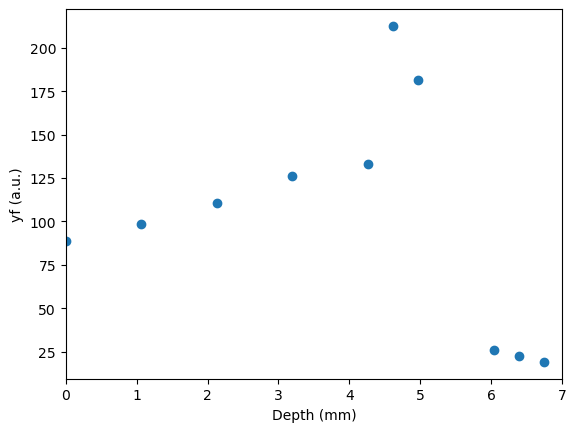

In [10]:
#plot yf in terms of depth

import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('yd_yf_finalMOD.txt')

plt.scatter(data[:, 2], data[:, 0])
plt.xlabel('Depth (mm)')
plt.ylabel('yf (a.u.)')
plt.xlim(0, 7)
plt.show()


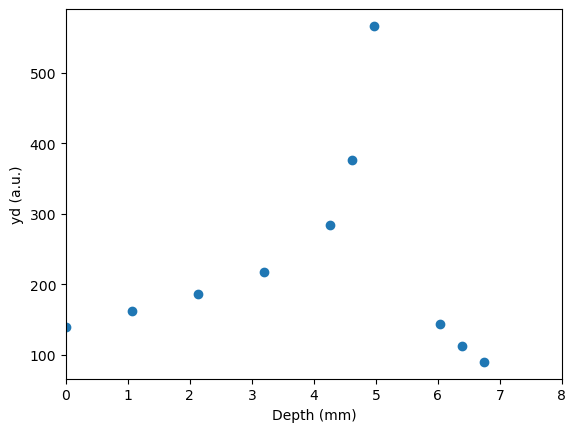

In [11]:


data = np.loadtxt('yd_yf_finalMOD.txt')

plt.scatter(data[:, 2], data[:, 1])
plt.xlabel('Depth (mm)')
plt.ylabel('yd (a.u.)')
plt.xlim(0, 8)
plt.show()


In [21]:
import numpy as np

# **CALCULATIONS FOR ERRORS ASSOCIATED WITH YD AND YF**

The frequency-mean lineal energy, **yF**, and the dose-mean lineal energy, **Yd**, are defined as follows:

\begin{equation}
    \overline{y}_F = \int_0^{\infty} yf(y)dy
\end{equation}

## 

\begin{equation}
\overline{y}_D= \int_0^{\infty} yd(y)dy = \frac{1}{\overline{y}_F} \int_0^{\infty}y^2f(y)dy =\frac{\int_0^{\infty}y^2f(y)dy}{\int_0^{\infty}yf(y)dy}
\end{equation}

The statistical uncertainty estimated in $\overline{y_f}$ using the error
propagation formula is given as:

\begin{equation} \sigma_{yf} = \sqrt{\frac{\sum_{i} y_{i}^2f(y_{i})}{(\sum_{i} y_{i}f(y_{i}))^2} + \frac{\sum_{i} f(y_{i})}{(\sum_{i} f(y_{i}))^2}}
\end{equation}


The statistical uncertainty estimated in $\overline{y_d}$ using the error
propagation formula is given as:

\begin{equation} \sigma_{yd} = \sqrt{\frac{\sum_{i} y_{i}^2d(y_{i})}{(\sum_{i} y_{i}d(y_{i}))^2} + \frac{\sum_{i} d(y_{i})}{(\sum_{i} d(y_{i}))^2}}
\end{equation}


## **Now, we will define function to calculate yf, yd, and their uncertainties**

In [12]:
import numpy as np

def YD_YF_calculation(File):
    a = 2.9
    b = -0.05

    Channel = np.arange(8192)
    Channel = np.roll(Channel, 2)
    Mean_chord_lenght = 17.24
    Ey = Channel * a + b
    y = (Ey / Mean_chord_lenght) #2.85

    Fy = File
    Int_Fy = np.trapz(Fy, y)
    fy = Fy / Int_Fy

    yF = np.trapz(y*fy, y)

    dY = (y*fy)/yF

    yD = np.trapz(y*dY, y)


#HERE WE WILL SEPARETE ALL TERMS IN THE EQUATION FOR SIGMA_YF
    s1=np.sum(y**2 *fy)
    s2=(np.sum(y*fy))**2
    s3=np.sum(fy)
    s4=(np.sum(fy))**2

    sigma=np.sqrt(s1/s2+s3/s4)
    sigma_yf=sigma 

#HERE WE WILL SEPARETE ALL TERMS IN THE EQUATION FOR SIGMA_YD

    s5=np.sum(y**2 *dY)
    s6=(np.sum(y*dY))**2
    s7=np.sum(dY)
    s8=(np.sum(dY))**2

    sigma=np.sqrt(s5/s6+s7/s8)
    sigma_yd=sigma
    
    return yF, yD, sigma_yf, sigma_yd


## **Now we define function to read the file obtained from the MCA**

In [13]:
#implement function that will read the MCA file


def Read_MCA_file(filename, startRow=13, endRow=8191):
    delimiter = ' '

    # Format for each line of text:
    #   column1: double (%f)
    formatSpec = '%f%*s%*s%*s%*s%[^\n\r]'

    # Open the text file and read lines 13 to 8191.
    with open(filename, 'r') as fileID:
        lines = fileID.readlines()[startRow-1:endRow]

    # Parse the lines using the specified format.
    dataArray = np.genfromtxt(
        lines,
        delimiter=delimiter,
        comments=None,
        dtype=None,
        converters={0: lambda s: float(s.strip())})


    return dataArray


## **Finally, we store the values of yf, yd, and their uncertainties in a file**

In [15]:
# create an empty numpy array to store the data
data = np.empty((0, 4))

filename=[0, 3, 6, 9, 12, 13, 14, 17, 18, 19]
# loop over the files and calculate yf and yd for each file
for i in filename:
    filename = f'Gaf{i}_10um_basso_rate_2pA_Mod.txt'
    gaf = Read_MCA_file(filename, startRow=13, endRow=8204)

    yf, yd, sigma_yf, sigma_yd = YD_YF_calculation(gaf)

    # append the data to the numpy array
    data = np.vstack([data, [yf, yd, sigma_yf, sigma_yd]])

# save the data to a ods file with headers
np.savetxt('errors_data.txt', data, header='yf yd sigma_yf sigma_yd')

#we have to asociate the depth to each yf and yd value
data1 = np.loadtxt('yd_yf_finalMOD.txt')

#from data1 import last column to file errors_data.txt
data2 = np.loadtxt('errors_data.txt')

final_yf_yd = np.hstack((data1, data2[:, 2:4]))
final_yf_yd[:, [0, 1, 2, 3]] = final_yf_yd[:, [2, 0, 1, 3
                                               ]]
np.savetxt('errors_finaldata.txt', final_yf_yd)

#add headers to the file
np.savetxt('errors_finaldata.txt', final_yf_yd, header='depth yf yd sigma_yf sigma_yd')



In [16]:
#convert txt file to ods file
import pandas as pd
import numpy as np

data = np.loadtxt('errors_finaldata.txt')

df = pd.DataFrame(data, columns=['depth', 'yf', 'yd', 'sigma_yf', 'sigma_yd'])

df.to_excel('errors_finaldata.xlsx', index=False)


## **PLOTS OF YF AND YD VS DEPTH WITH ERROR BARS**